<a href="https://colab.research.google.com/github/kareem743/projects/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Citation**
Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

# **Genreal overview of the data**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:

student_data=pd.read_csv(r'/content/data.csv',delimiter=';')
#for safe keeping
orginal=student_data
student_data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [5]:
#check for nulls
student_data.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [6]:
print(student_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
#uses the .astype(bool) method to cast the values in these columns to bool dtype,
bool_col=['Daytime/evening attendance\t','Gender','Displaced','Educational special needs','Debtor','Scholarship holder','International','Tuition fees up to date']
student_data[bool_col]=student_data[bool_col].astype(bool)

In [8]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   bool   
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# **Train-test split**

In [9]:

#Splitting the data before feature engineering prevents overfitting because it ensures that the features are selected based on the training data only, and not influenced by the test data.
#Overfitting occurs when a model becomes too complex and learns to fit the training data too closely, which can lead to poor performance on unseen data.

#drops Enrolled
student_data=student_data[student_data.Target != 'Enrolled']
student_data.Target.unique()
Y=student_data['Target']
#drops Target
student_data = student_data.loc [:, student_data.columns != 'Target']


from sklearn.model_selection import train_test_split
#split the data
X = student_data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)



In [10]:
print(f"the shape of X_train:  {X_train.shape}")
print(f"the shape of X_test :  {X_test.shape}")
print(f"the shape of y_train:  {y_train.shape}")
print(f"the shape of y_test :  {y_test.shape}")

the shape of X_train:  (2904, 36)
the shape of X_test :  (726, 36)
the shape of y_train:  (2904,)
the shape of y_test :  (726,)


In [11]:
X_train.describe()

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,...,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,1.183196,18.321281,1.755165,8835.238981,4.555096,132.970386,1.794077,19.892906,22.511708,10.324725,...,0.128444,0.554063,6.261364,7.737948,4.473485,9.964514,0.135331,11.622039,1.234298,-0.008853
std,0.612349,17.335112,1.339267,2102.232865,10.068953,13.144288,6.401937,15.577899,15.296198,23.707286,...,0.667407,1.955191,2.240656,3.950154,3.145784,5.516517,0.712038,2.656547,1.392307,2.257059
min,1.000000,1.000000,0.000000,33.000000,1.000000,96.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.500000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,18.000000,23.000000,33.000000,20.000000,17.714286,12.000000,16.200000,3.700000,3.510000


# Handling Unbalanced Data#
Unbalanced data is a common problem in machine learning, especially in classification tasks. It means that the classes that you want to predict have different numbers of examples, and usually one class (the majority class) has much more examples than the other class (the minority class).This can make it harder for your model to learn from the minority class and lead to poor performance or biased results

In [12]:
print(y_train.unique())
print(y_train.value_counts())


['Dropout' 'Graduate']
Graduate    1760
Dropout     1144
Name: Target, dtype: int64


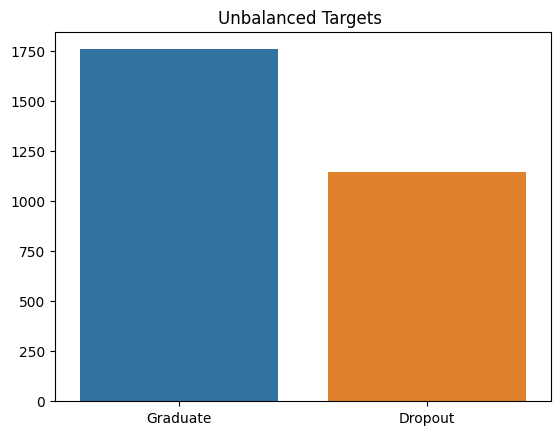

imbalance factor = 0.65


In [13]:
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values)
sns.set_style('darkgrid')
plt.title("Unbalanced Targets ")

plt.show()
print(f"imbalance factor = {sum(y_train=='Dropout')/sum(y_train=='Graduate')}")

Synthetic Minority Oversampling Technique(SMOTE) is a method for dealing with imbalanced classification problems SMOTE works by creating new synthetic examples for the minority class, based on the existing examples, to balance the class distribution and improve the performance of the model

In [14]:
from imblearn.over_sampling import SMOTE
# Fitting SMOTE to the train set
smote = SMOTE (random_state=27)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f"the shape of X_train:  {X_train.shape}")
print(f"the shape of X_test :  {X_test.shape}")
print(f"the shape of y_train:  {y_train.shape}")
print(f"the shape of y_test :  {y_test.shape}")
print(f"imbalance factor = {sum(y_train=='Dropout')/sum(y_train=='Graduate')}")

the shape of X_train:  (3520, 36)
the shape of X_test :  (726, 36)
the shape of y_train:  (3520,)
the shape of y_test :  (726,)
imbalance factor = 1.0


#  selecting numerical features

<Axes: >

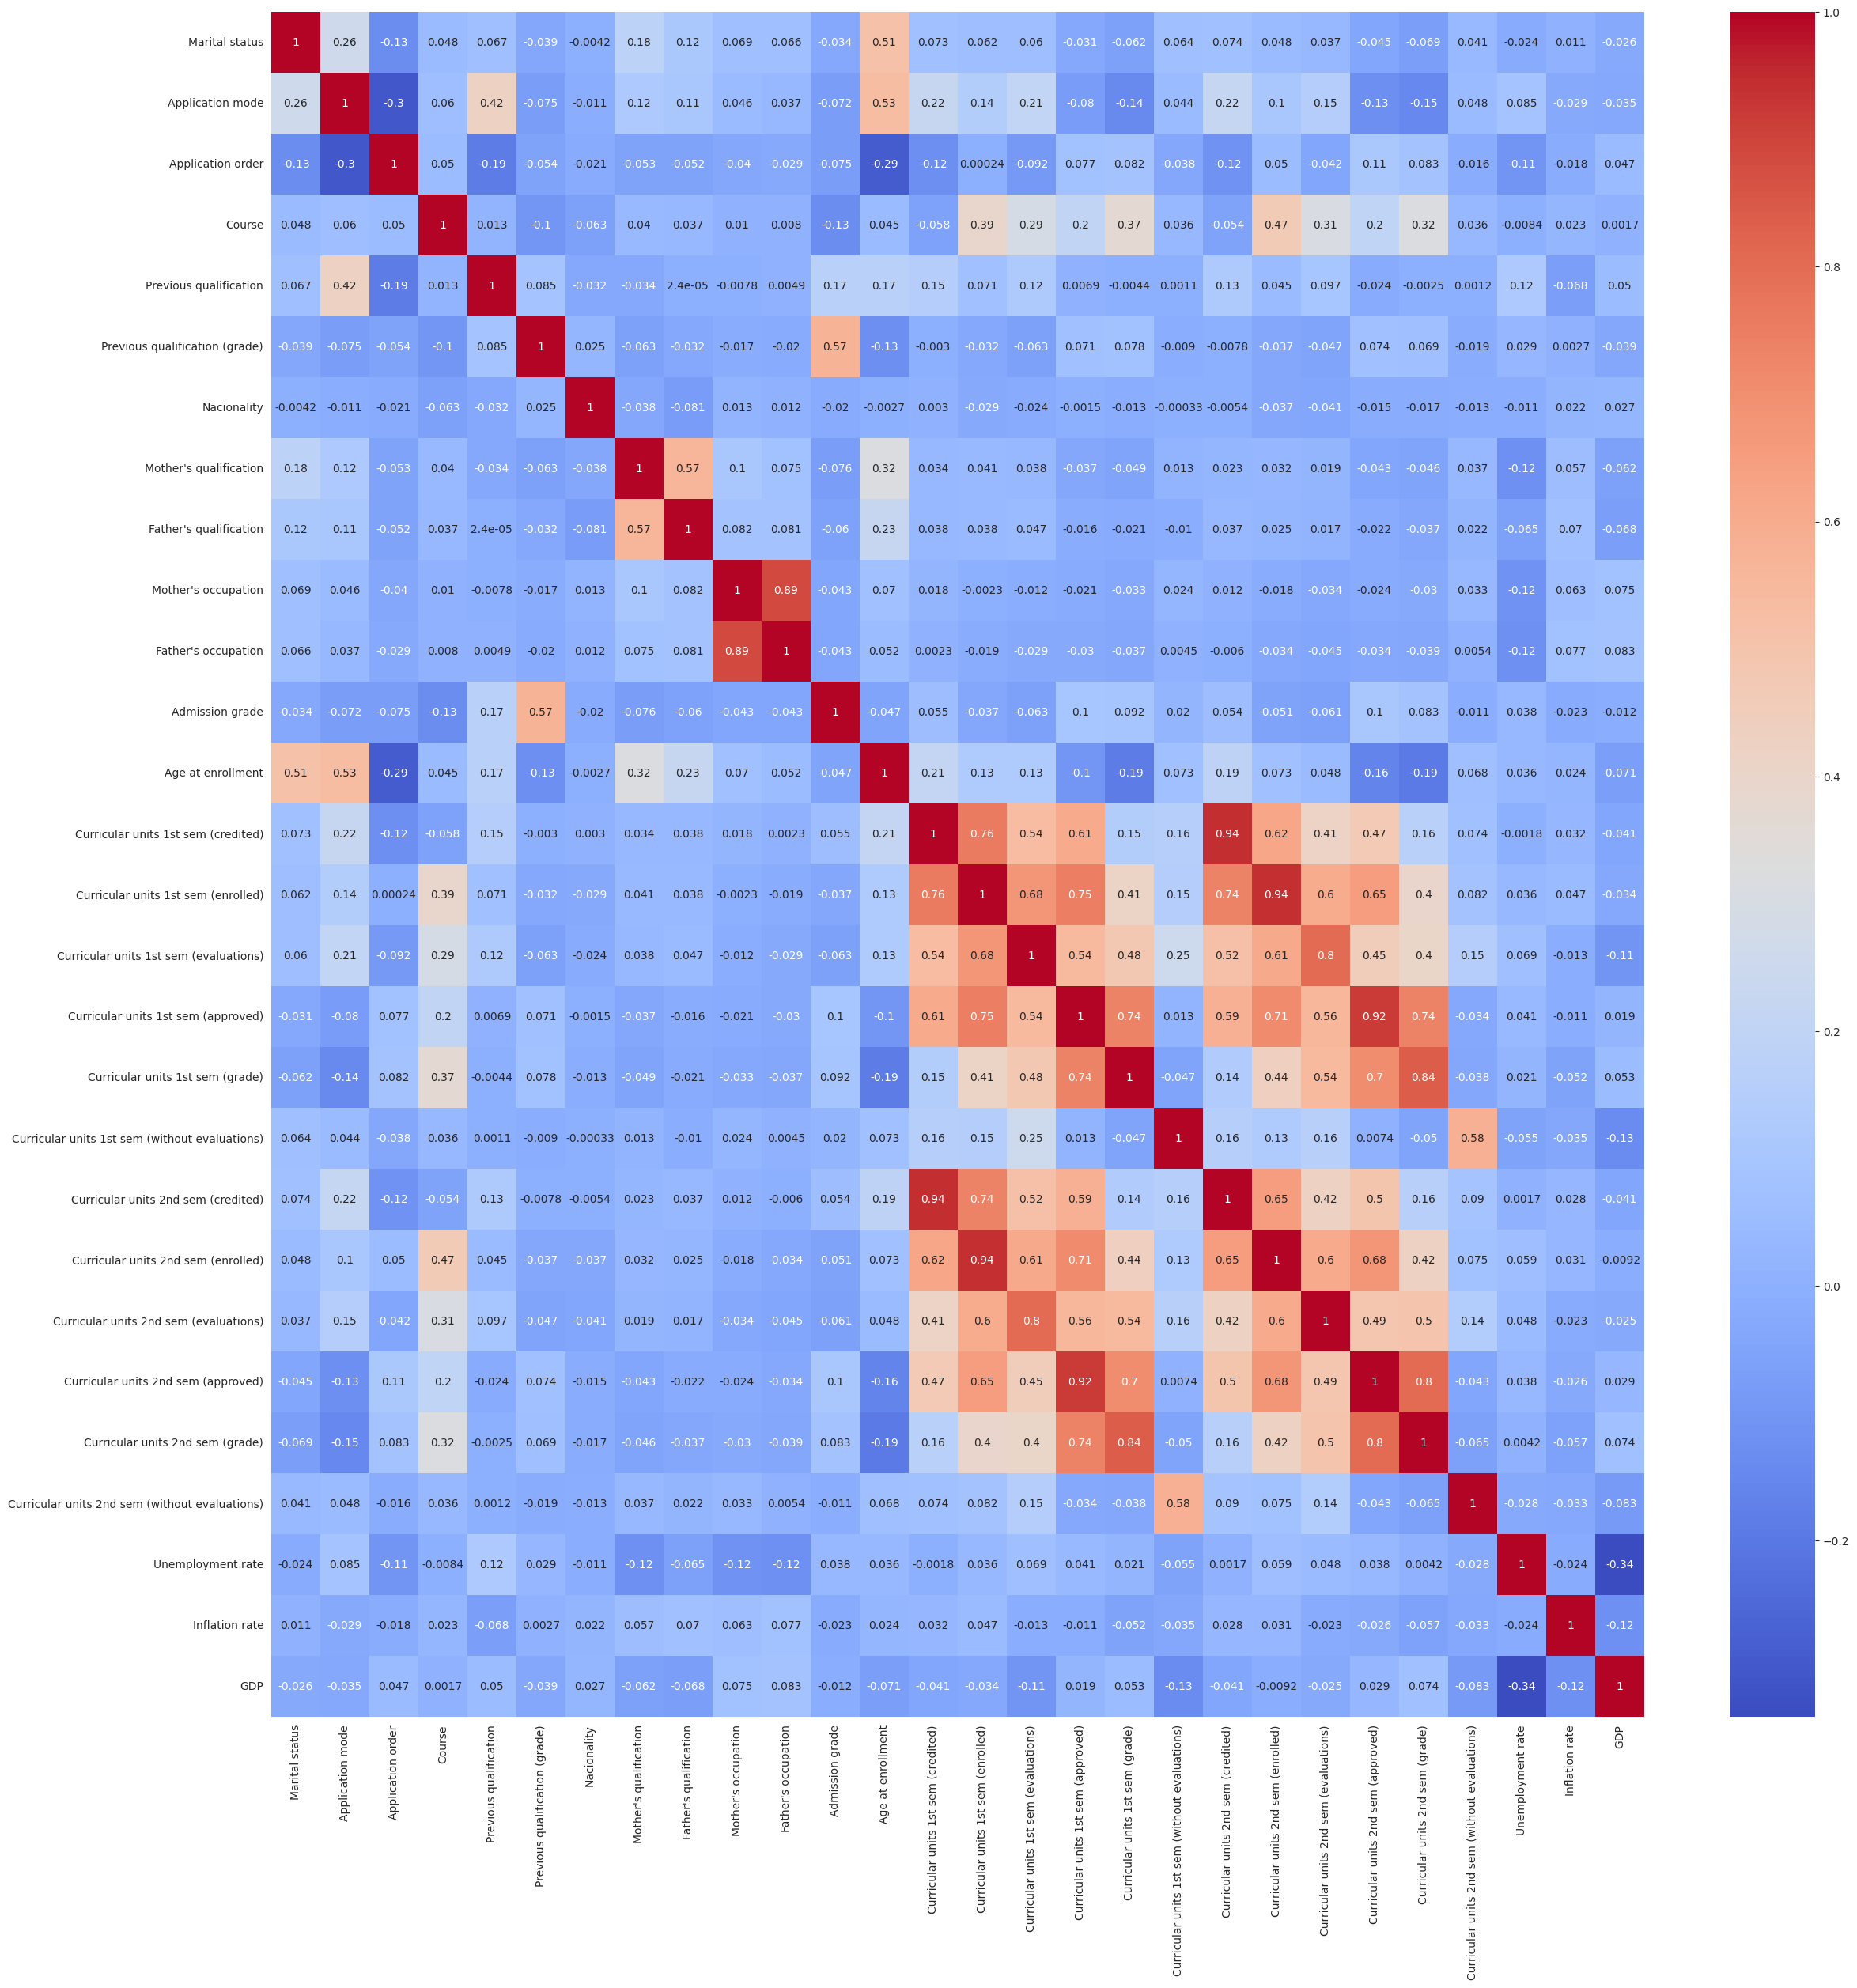

In [15]:
num_col = X_train.select_dtypes(exclude=['bool']).columns
corr=X_train[num_col].corr()
plt.figure(figsize=(28,28))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [16]:
def correlation(dataset, threshold):
  col_corr = set() # Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
     if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
        colname = corr_matrix.columns [i] # getting the name of column
        col_corr.add(colname)
  return col_corr
ds=X_train[num_col]
corr_col=correlation(ds,0.75)
print(f"the fetures with the most correlation between each other are :\n{corr_col}")

the fetures with the most correlation between each other are :
{'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (enrolled)', "Father's occupation", 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)'}


In [17]:
X_train.drop(corr_col,inplace=True,axis=1)
X_test.drop(corr_col,inplace=True,axis=1)

# selecting catgorical features

In [18]:
y_train = y_train.map({'Graduate': 1, 'Dropout': 0})
y_test = y_test.map({'Graduate': 1, 'Dropout': 0})

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


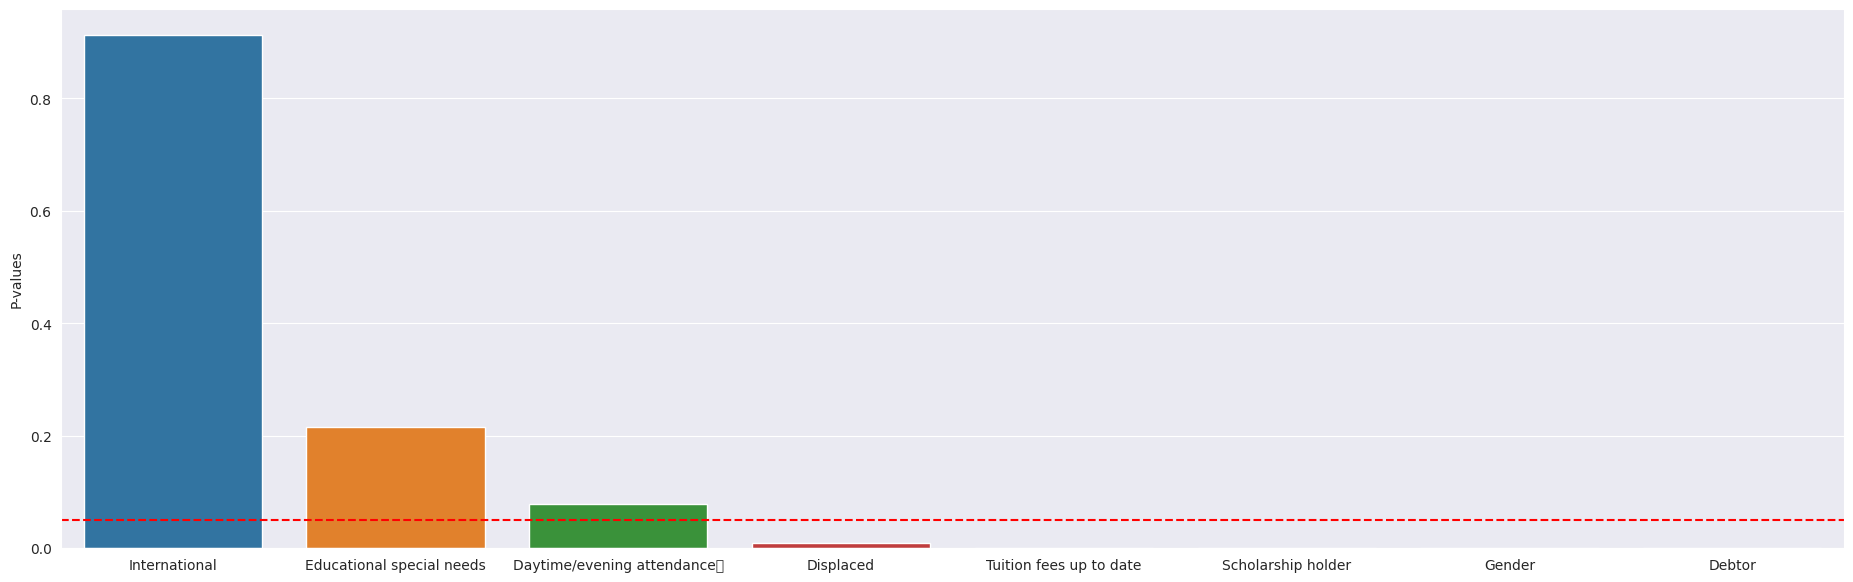

In [19]:
#chi squared test of  independence the null hypthiss is that all the catgories are independent to the target
#assuimg a signficne level alpha=0.05 we reject the null hypothisis that 'Gender','Displaced','Debtor','Scholarship holder','Tuition fees up to date' are not indepndent of the target
from sklearn.feature_selection import chi2
cat_data=X_train[['Daytime/evening attendance\t','Gender','Displaced','Educational special needs','Debtor','Scholarship holder','International','Tuition fees up to date']]
chi2_scores=chi2(X=cat_data,y=y_train)
p_values=pd.Series(chi2_scores[1],index=cat_data.columns)
p_values.sort_values(ascending=False,inplace=True)
sns.barplot(x=p_values.index,y=p_values)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance level')
plt.gcf().set_size_inches(23, 7)
plt.ylabel("P-values")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


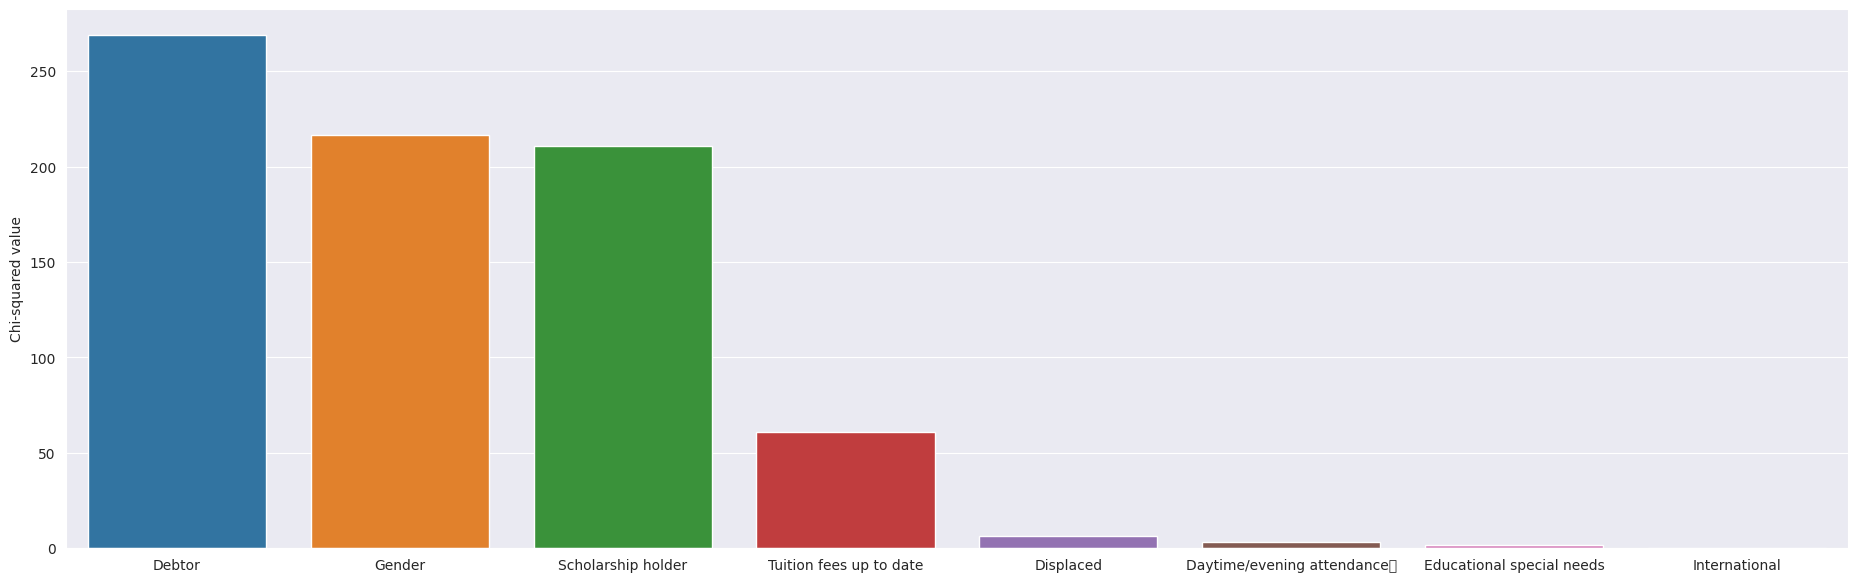

In [20]:
#We can strengthen our conclusion by looking at the chi-squared values, and use a rough guideline of: the higher the chi-squared value, the stronger the evidence against the null hypothesis.
#This means that the features with high chi-squared values are more likely to be related to the target variable than the features with low chi-squared values.
chi2_values = pd.Series(chi2_scores[0], index=cat_data.columns)
chi2_values.sort_values(ascending=False, inplace=True)


sns.barplot(x=chi2_values.index, y=chi2_values)
plt.gcf().set_size_inches(23, 7)
plt.ylabel("Chi-squared value")
plt.show()

In [21]:
X_train.drop(['Daytime/evening attendance\t',"Educational special needs",'International'],inplace=True,axis=1)
X_test.drop(['Daytime/evening attendance\t',"Educational special needs",'International'],inplace=True,axis=1)


In [33]:
print(f"x train : {X_train.columns}\n\nx test : {X_test.columns}")

x train : Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Admission grade', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

x test : Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mothe

In [36]:
print(f"num of x train : {len(X_train.columns)}\n\nnum of  x test : {len(X_test.columns)}")


num of x train : 26

num of  x test : 26


In [23]:
X_train_np=X_train.to_numpy(dtype='float64')
X_test_np=X_test.to_numpy(dtype='float64')
y_train_np=y_train.to_numpy(dtype='float64')
y_test_np=y_test.to_numpy(dtype='float64')





# Training the model

In [ ]:
#Setting a random seed can help to ensure that the results of your machine learning experiments are reproducibl
tf.random.set_seed(41)
#Creating a sequential model with five dense layers and different activation
model = tf.keras.Sequential([


    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#Compiling the model with the Adam optimizer, the binary cross-entropy loss function,
model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
loss=tf.keras.losses.BinaryCrossentropy(),
metrics=[tf.keras.metrics.BinaryAccuracy()]
)
#Fitting the model on the training data
model.fit(X_train_np, y_train_np, epochs=8000)
#Evaluating the model on the test data and printing the loss and accuracy
model.evaluate(X_test_np, y_test_np)

Streaming output truncated to the last 5000 lines.
110/110 [==============================] - 0s 3ms/step - loss: 0.6880 - binary_accuracy: 0.5114
Epoch 474/8000
110/110 [==============================] - 0s 3ms/step - loss: 0.6877 - binary_accuracy: 0.5102
Epoch 475/8000
110/110 [==============================] - 0s 2ms/step - loss: 0.6879 - binary_accuracy: 0.5102
Epoch 476/8000
110/110 [==============================] - 0s 3ms/step - loss: 0.6878 - binary_accuracy: 0.5116
Epoch 477/8000
110/110 [==============================] - 0s 2ms/step - loss: 0.6877 - binary_accuracy: 0.5108
Epoch 478/8000
110/110 [==============================] - 0s 2ms/step - loss: 0.6876 - binary_accuracy: 0.5111
Epoch 479/8000
110/110 [==============================] - 0s 2ms/step - loss: 0.6876 - binary_accuracy: 0.5114
Epoch 480/8000
110/110 [==============================] - 0s 3ms/step - loss: 0.6878 - binary_accuracy: 0.5088
Epoch 481/8000
110/110 [==============================] - 0s 2ms/step - loss

# Evaluate

In [70]:
model.evaluate(x=X_test_np,y=y_test_np)

23/23 [==============================] - 0s 2ms/step - loss: 0.3037 - binary_accuracy: 0.8926


[0.30369052290916443, 0.8925619721412659]

The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives for each class The diagonal elements represent the correct predictions, while the off-diagonal elements represent the incorrect predictions The accuracy of the model can be calculated by dividing the

23/23 [==============================] - 0s 1ms/step


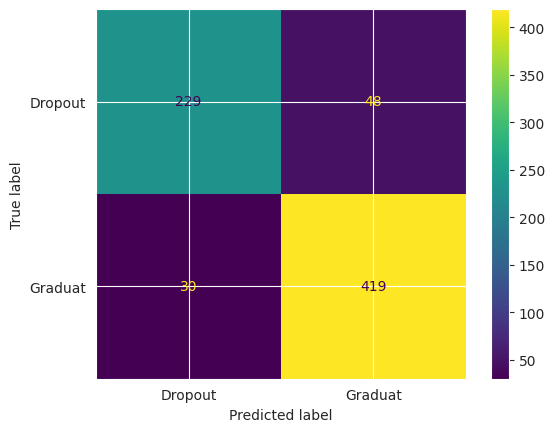

In [67]:
#Using the model to predict the probabilities for the test data
y_pred=model.predict(X_test_np)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Computing the confusion matrix by comparing the actual labels and the rounded predictions
cm = confusion_matrix(y_test, tf.round (y_pred))

ConfusionMatrixDisplay(cm,display_labels=['Dropout', 'Graduat']).plot()

## Classification metrics

\begin{align}
 \text {Precision} = \frac {\text {TP}} {\text {TP} + \text {FP}}
\end{align}
\begin{align}
\end{align}

\begin{align}
  \text {Recall   } = \frac {\text {TP}}
  {\text {TP} + \text {FN}}
\end{align}
\begin{align}
\end{align}
\begin{align}
 \text {F1 Score} = \frac {2 \times \text {Precision} \times \text
  {Recall}} {\text {Precision} + \text {Recall}} = \frac {2 \times
  \text {TP}} {2 \times \text {TP} + \text {FP} + \text {FN}}
\end{align}



*  A true positive (TP) is an outcome where the model correctly predicts the positive class. For example, if the model predicts that an email is spam and it is actually spam, that is a true positive.

* A false positive (FP) is an outcome where the model incorrectly predicts the positive class. For example, if the model predicts that an email is spam but it is actually not spam, that is a false positive.

* A true negative (TN) is an outcome where the model correctly predicts the negative class. For example, if the model predicts that an email is not spam and it is actually not spam, that is a true negative.

* A false negative (FN) is an outcome where the model incorrectly predicts the negative class. For example, if the model predicts that an email is not spam but it is actually spam, that is a false negative.





---


* Precision is the ratio of true positives to the total number of predicted positives. It measures how accurate the model is when it predicts the positive class. A high precision means that the model has few false positives and most of its positive predictions are correct. A low precision means that the model has many false positives and many of its positive predictions are wrong. The formula for precision is:


* Recall is the ratio of true positives to the total number of actual positives. It measures how complete the model is in identifying all the positive cases. A high recall means that the model has few false negatives and most of the actual positive cases are predicted as positive. A low recall means that the model has many false negatives and many of the actual positive cases are missed by the model. The formula for recall is:



* F1 score is the harmonic mean of precision and recall. It combines both metrics into one single value that represents the balance between them. A high F1 score means that the model has both high precision and high recall, which means it is both accurate and complete in predicting the positive class. A low F1 score means that either precision or recall or both are low, which means the model is either inaccurate or incomplete or both in predicting the positive class. The formula for F1 score is:












In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np,tf.round (y_pred),labels=[0,1],target_names=['Dropout', 'Graduat']))


              precision    recall  f1-score   support

     Dropout       0.88      0.83      0.85       277
     Graduat       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



## Matthews correlation coefficient

\begin{align}\text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}\end{align}


Matthews correlation coefficient (MCC) is a measure of the quality of a binary classification. It ranges from -1 to 1, where 1 means perfect agreement, 0 means random prediction, and -1 means total disagreemen

In [69]:
from math import sqrt
TN,FP,FN,TP=cm.ravel()
MCC = (TP*TN - FP*FN) / sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print(f"The Matthews correlation coefficient is equal : {MCC}")

The Matthews correlation coefficient is equal : 0.770568019966114
